In [1]:
from utils import *
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from pyvis.network import Network

with open('usernames.pkl', 'rb') as f:
    users = pickle.load(f)
with open('games.pkl', 'rb') as f:
    foundGames = pickle.load(f)
with open('ratings.pkl', 'rb') as f:
    ratings = pickle.load(f)

In [2]:
numRatings = 0
ratingTotals = []
rList = []
for k in ratings.keys():
    numRatings += len(ratings[k])
    if len(ratings[k]) < 1 : continue
    tmpTotal = 0
    for r in ratings[k]:
        if r[1] == None: continue
        tmpTotal += r[1]
        rList.append(r[1])

    ratingTotals.append( (k,tmpTotal) )

ratingTotals.sort(key=lambda x: x[1], reverse=True)

print('NUM RATINGS: '+str(numRatings))
print('Top 10 games based on sum of gathered ratings')
for r in ratingTotals[:10]:
    print(foundGames[r[0]].name + '\t'+str(r[1]))

NUM RATINGS: 411302
Top 10 games based on sum of gathered ratings
Terraforming Mars	2412.3900000000003
Carcassonne	2312.822
Pandemic	2289.9690000000005
Wingspan	2182.0460000000003
7 Wonders	2180.525
CATAN	2107.526
Scythe	2055.7250000000004
Codenames	2017.1439999999998
Dominion	2006.4499999999998
Azul	1945.8550000000002


In [3]:
for user in users:
    flag = False
    for k in ratings.keys():
        for r in ratings[k]:
            if(r[0]==user):
                flag = True
                break
        if flag: break
    if flag==False: print('MISSING: '+user)

MISSING: Ezrio92
MISSING: sonicsink
MISSING: geoffrey69
MISSING: Logitude
MISSING: scoobysnack
MISSING: DireSickFish
MISSING: PaBou
MISSING: Ironman1st
MISSING: Sbae
MISSING: khenze
MISSING: bggrocks
MISSING: J0h4nn
MISSING: SilentTempest
MISSING: kllohr7
MISSING: Norbert714
MISSING: MichalJ7
MISSING: Ylluan
MISSING: jp091618
MISSING: Umbra0118
MISSING: Black hat miniatures
MISSING: SirMrMister
MISSING: Takfloyd
MISSING: Juiblex
MISSING: SteamCraft
MISSING: felkdav
MISSING: SammyBoyFTW
MISSING: Fuchur
MISSING: trwc31
MISSING: mtgjapan
MISSING: Thanee
MISSING: NathanGPLC
MISSING: Dr Who
MISSING: MPTGEEK
MISSING: celebrist
MISSING: Spydabyte
MISSING: Crender
MISSING: Oerjan
MISSING: Joetoledojoe
MISSING: Commedia
MISSING: Borbarad
MISSING: Kohcee97
MISSING: Cuho
MISSING: Thanos92
MISSING: aronwest
MISSING: Madmullet
MISSING: thelame
MISSING: philip69
MISSING: Lokipower
MISSING: sundialgames
MISSING: Obri
MISSING: Qualeor
MISSING: Brickosaur
MISSING: coreynoemi


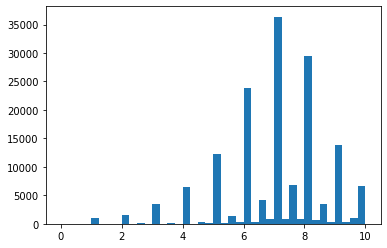

In [4]:
plt.hist(rList, bins=[t/4 for t in range(41)])
#plt.yscale('log')
plt.show() 

In [5]:
from scipy.stats import skew
print('AVG: '+str(np.average(rList)))
print('STD: '+str(np.std(rList)))
print('SKEW: '+str(skew(rList)))

AVG: 6.924498478914321
STD: 1.672673596117308
SKEW: -0.705297950915183


In [6]:
numOverlap = np.zeros( (len(users),len(users)) )
diffOverlap = np.zeros( (len(users),len(users)) )
userIDs = {}
for u in range(len(users)):
    userIDs[users[u]] = u
for k in ratings.keys():
    for r1 in ratings[k]:
        for r2 in ratings[k]:
            if r1[0]==r2[0]: continue
            if r1[1]==None or r2[1]==None: continue
            numOverlap[userIDs[r1[0]], userIDs[r2[0]]] += 1
            diffOverlap[userIDs[r1[0]], userIDs[r2[0]]] += np.abs(r1[1]-r2[1])

for i in range(len(users)):
    for j in range(len(users)):
        if numOverlap[i,j]==0: 
            diffOverlap[i,j] = -1
            continue
        diffOverlap[i,j] = diffOverlap[i,j]/numOverlap[i,j]



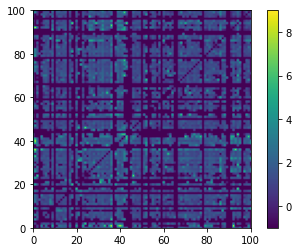

In [7]:
plt.ylim(0,100)
plt.xlim(0,100)
plt.imshow(diffOverlap)
plt.colorbar()        

(array([3.97822e+05, 0.00000e+00, 0.00000e+00, 1.30020e+04, 1.59840e+04,
        3.46240e+04, 8.97520e+04, 7.19540e+04, 4.23560e+04, 4.04600e+04,
        1.70220e+04, 7.93800e+03, 1.26080e+04, 4.20800e+03, 1.73200e+03,
        4.73200e+03, 1.18000e+03, 3.82000e+02, 2.04200e+03, 3.58000e+02,
        8.00000e+01, 1.04800e+03, 1.06000e+02, 3.20000e+01, 5.64000e+02,
        4.20000e+01, 4.00000e+00, 2.20000e+02, 1.00000e+01, 1.22000e+02]),
 array([-1.        , -0.66666667, -0.33333333,  0.        ,  0.33333333,
         0.66666667,  1.        ,  1.33333333,  1.66666667,  2.        ,
         2.33333333,  2.66666667,  3.        ,  3.33333333,  3.66666667,
         4.        ,  4.33333333,  4.66666667,  5.        ,  5.33333333,
         5.66666667,  6.        ,  6.33333333,  6.66666667,  7.        ,
         7.33333333,  7.66666667,  8.        ,  8.33333333,  8.66666667,
         9.        ]),
 <BarContainer object of 30 artists>)

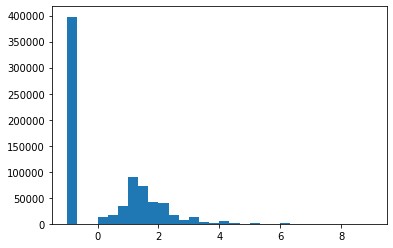

In [8]:
plt.hist(diffOverlap.flatten(), bins=30)

AVG:1.6075951797921775
STD:0.9245651502378339
SKEW:1.8887232938063028


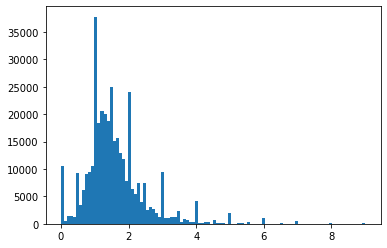

In [9]:
diffOverlapNoNeg = diffOverlap[diffOverlap!=-1]
plt.hist(diffOverlapNoNeg.flatten(), bins=100)
print('AVG:'+str(np.average(diffOverlapNoNeg)))
print('STD:'+str(np.std(diffOverlapNoNeg)))
print('SKEW:'+str(skew(diffOverlapNoNeg)))


In [10]:
numOverlap

array([[ 0.,  0.,  6., ...,  2.,  0.,  6.],
       [ 0.,  0.,  7., ...,  4.,  0.,  0.],
       [ 6.,  7.,  0., ..., 19.,  0., 14.],
       ...,
       [ 2.,  4., 19., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0., 14., ...,  1.,  0.,  0.]])

In [11]:
avgDiff = np.average(diffOverlapNoNeg)
g = nx.Graph()

for u1 in range(len(users)):
    g.add_node(users[u1])

for u1 in range(len(users)):
    bestOverlap = []
    for u2 in range(len(users)):
        if numOverlap[u1][u2] < 10 : continue
        if diffOverlap[u1][u2] > 1 : continue

        if len(bestOverlap)<1:
            bestOverlap.append( (u2, diffOverlap[u1][u2]))
            continue

        for i in range(len(bestOverlap)):
            if numOverlap[u1][u2] > bestOverlap[i][1]:
                bestOverlap.insert(i, (u2, numOverlap[u1][u2]))
                break
            
        if len(bestOverlap) > 1: bestOverlap.pop()

    for o in bestOverlap:    
        g.add_edge(users[u1],users[o[0]])
g.number_of_edges()


537

In [12]:
nt = Network('1080px', '1920px')
nt.from_nx(g)
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')